DAtaset 1: Traffic infringements

In [20]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = 'Trafficinfringementsissued.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary of the data
data.head()



,Financial Year,Police Region,Police District,Offence Type,Breach or Ticket,Offence Code,Offence Description,Total
0,2013-14,BRISBANE,NORTH BRISBANE,1M/1.5M Passing Offence,T,3334,FAIL TO MAINTAIN 1M/1.5M WHEN PASSING A BICYCLE,1
1,2013-14,BRISBANE,NORTH BRISBANE,Accreditation,T,4699,ACCREDITED PERSON FAIL TO DISPLAY ACCREDITED D...,1
2,2013-14,BRISBANE,NORTH BRISBANE,Accreditation,T,4700,ACCREDITED PERSON FAIL TO CARRY/PRODUCE ACCRED...,2
3,2013-14,BRISBANE,NORTH BRISBANE,Accreditation,T,4704,DRIVE PILOT VEHICLE NOT IN ACCORDANCE WITH GUI...,1
4,2013-14,BRISBANE,NORTH BRISBANE,Accreditation,T,4705,DRIVE ESCORT VEHICLE NOT IN ACCORDANCE WITH GU...,4


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75310 entries, 0 to 75309
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Financial Year       75309 non-null  object
 1   Police Region        75307 non-null  object
 2   Police District      75307 non-null  object
 3   Offence Type         75307 non-null  object
 4   Breach or Ticket     75307 non-null  object
 5   Offence Code         75307 non-null  object
 6   Offence Description  75307 non-null  object
 7   Total                75307 non-null  object
dtypes: object(8)
memory usage: 4.6+ MB


In [22]:
data.describe()

,Financial Year,Police Region,Police District,Offence Type,Breach or Ticket,Offence Code,Offence Description,Total
count,75309,75307,75307,75307,75307,75307,75307,75307
unique,11,7,16,161,2,2769,2479,1795
top,2014-15,SOUTHERN,NORTH BRISBANE,Moving Traffic Offence,T,5489,USE/PERMIT USE OF UNREG 4 CYLINDER OR 2 ROTOR ...,1
freq,9488,16582,7541,7085,66668,241,289,21772


In [23]:
data.describe(include='all')

,Financial Year,Police Region,Police District,Offence Type,Breach or Ticket,Offence Code,Offence Description,Total
count,75309,75307,75307,75307,75307,75307,75307,75307
unique,11,7,16,161,2,2769,2479,1795
top,2014-15,SOUTHERN,NORTH BRISBANE,Moving Traffic Offence,T,5489,USE/PERMIT USE OF UNREG 4 CYLINDER OR 2 ROTOR ...,1
freq,9488,16582,7541,7085,66668,241,289,21772


In [24]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set plot style
# sns.set(style="whitegrid")

# # Distribution of Breach or Ticket
# plt.figure(figsize=(8, 6))
# sns.countplot(x='Breach or Ticket', data=data)
# plt.title('Distribution of Breach or Ticket')
# plt.xlabel('Breach or Ticket')
# plt.ylabel('Count')
# plt.show()

# # Offences by Police Region
# plt.figure(figsize=(12, 8))
# sns.countplot(y='Police Region', data=data, order=data['Police Region'].value_counts().index)
# plt.title('Offences by Police Region')
# plt.xlabel('Count')
# plt.ylabel('Police Region')
# plt.show()

# # Most Common Offence Types
# plt.figure(figsize=(12, 8))
# top_offences = data['Offence Type'].value_counts().nlargest(10)
# sns.barplot(y=top_offences.index, x=top_offences.values)
# plt.title('Top 10 Most Common Offence Types')
# plt.xlabel('Count')
# plt.ylabel('Offence Type')
# plt.show()


In [25]:
# Convert the 'Total' column to numeric and handle missing values
data['Total'] = pd.to_numeric(data['Total'], errors='coerce')

# Drop rows with missing values
clean_data = data.dropna()

# Convert 'Breach or Ticket' to a categorical type
clean_data['Breach or Ticket'] = clean_data['Breach or Ticket'].astype('category')

# Verify changes
clean_data.info(), clean_data.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 74272 entries, 0 to 75306
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Financial Year       74272 non-null  object  
 1   Police Region        74272 non-null  object  
 2   Police District      74272 non-null  object  
 3   Offence Type         74272 non-null  object  
 4   Breach or Ticket     74272 non-null  category
 5   Offence Code         74272 non-null  object  
 6   Offence Description  74272 non-null  object  
 7   Total                74272 non-null  float64 
dtypes: category(1), float64(1), object(6)
memory usage: 4.6+ MB


(None,
               Total
 count  74272.000000
 mean      31.037295
 std       92.934475
 min        1.000000
 25%        1.000000
 50%        4.000000
 75%       17.000000
 max      999.000000)

In [26]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Set the theme for seaborn
# sns.set_theme(style="whitegrid")

# # Distribution of Infringements by Financial Year
# plt.figure(figsize=(10, 6))
# sns.countplot(data=clean_data, x='Financial Year', order=clean_data['Financial Year'].value_counts().index)
# plt.title('Distribution of Infringements by Financial Year')
# plt.xlabel('Financial Year')
# plt.ylabel('Number of Infringements')
# plt.xticks(rotation=45)
# plt.show()

# # Distribution by Police Region
# plt.figure(figsize=(10, 6))
# sns.countplot(data=clean_data, x='Police Region', order=clean_data['Police Region'].value_counts().index)
# plt.title('Distribution of Infringements by Police Region')
# plt.xlabel('Police Region')
# plt.ylabel('Number of Infringements')
# plt.xticks(rotation=45)
# plt.show()

# # Most Common Offence Types
# plt.figure(figsize=(10, 6))
# sns.countplot(data=clean_data, y='Offence Type', order=clean_data['Offence Type'].value_counts().head(10).index)
# plt.title('Top 10 Most Common Offence Types')
# plt.xlabel('Number of Infringements')
# plt.ylabel('Offence Type')
# plt.xticks(rotation=70)
# plt.show()

# # Breaches and Tickets side by side by Financial Year
# plt.figure(figsize=(12, 6))
# breach_ticket_by_year = clean_data.groupby(['Financial Year', 'Breach or Ticket']).size().reset_index(name='Count')
# sns.barplot(data=breach_ticket_by_year, x='Financial Year', y='Count', hue='Breach or Ticket', palette=['orange', 'blue'])
# plt.title('Breaches and Tickets by Financial Year')
# plt.xlabel('Financial Year')
# plt.ylabel('Number of Infringements')
# plt.xticks(rotation=45)
# plt.show()

# # Breaches and Tickets side by side by Police Region
# plt.figure(figsize=(12, 6))
# breach_ticket_by_region = clean_data.groupby(['Police Region', 'Breach or Ticket']).size().reset_index(name='Count')
# sns.barplot(data=breach_ticket_by_region, x='Police Region', y='Count', hue='Breach or Ticket', palette=['orange', 'blue'])
# plt.title('Breaches and Tickets by Police Region')
# plt.xlabel('Police Region')
# plt.ylabel('Number of Infringements')
# plt.xticks(rotation=45)
# plt.show()


In [27]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Set the theme for seaborn
# sns.set_theme(style="whitegrid", palette="pastel")

# # Distribution of Infringements by Financial Year
# plt.figure(figsize=(10, 6))
# sns.countplot(data=clean_data, x='Financial Year', order=clean_data['Financial Year'].value_counts().index, 
#               palette='mako')
# plt.title('Distribution of Infringements by Financial Year', fontsize=16, fontweight='bold')
# plt.xlabel('Financial Year', fontsize=14)
# plt.ylabel('Number of Infringements', fontsize=14)
# plt.xticks(rotation=45, fontsize=12)
# plt.yticks(fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.show()

# # Distribution by Police Region
# plt.figure(figsize=(10, 6))
# sns.countplot(data=clean_data, x='Police Region', order=clean_data['Police Region'].value_counts().index, 
#               palette='viridis')
# plt.title('Distribution of Infringements by Police Region', fontsize=16, fontweight='bold')
# plt.xlabel('Police Region', fontsize=14)
# plt.ylabel('Number of Infringements', fontsize=14)
# plt.xticks(rotation=45, fontsize=12)
# plt.yticks(fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.show()

# # Most Common Offence Types
# plt.figure(figsize=(10, 6))
# sns.countplot(data=clean_data, y='Offence Type', order=clean_data['Offence Type'].value_counts().head(10).index, 
#               palette='coolwarm')
# plt.title('Top 10 Most Common Offence Types', fontsize=16, fontweight='bold')
# plt.xlabel('Number of Infringements', fontsize=14)
# plt.ylabel('Offence Type', fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.show()

# # Breaches and Tickets side by side by Financial Year
# plt.figure(figsize=(12, 6))
# breach_ticket_by_year = clean_data.groupby(['Financial Year', 'Breach or Ticket']).size().reset_index(name='Count')
# sns.barplot(data=breach_ticket_by_year, x='Financial Year', y='Count', hue='Breach or Ticket', 
#             palette=['#FF6F61', '#6B5B95'])
# plt.title('Breaches and Tickets by Financial Year', fontsize=16, fontweight='bold')
# plt.xlabel('Financial Year', fontsize=14)
# plt.ylabel('Number of Infringements', fontsize=14)
# plt.xticks(rotation=45, fontsize=12)
# plt.yticks(fontsize=12)
# plt.legend(title='Breach or Ticket', fontsize=12, title_fontsize='13')
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.show()

# # Breaches and Tickets side by side by Police Region
# plt.figure(figsize=(12, 6))
# breach_ticket_by_region = clean_data.groupby(['Police Region', 'Breach or Ticket']).size().reset_index(name='Count')
# sns.barplot(data=breach_ticket_by_region, x='Police Region', y='Count', hue='Breach or Ticket', 
#             palette=['#FF6F61', '#6B5B95'])
# plt.title('Breaches and Tickets by Police Region', fontsize=16, fontweight='bold')
# plt.xlabel('Police Region', fontsize=14)
# plt.ylabel('Number of Infringements', fontsize=14)
# plt.xticks(rotation=45, fontsize=12)
# plt.yticks(fontsize=12)
# plt.legend(title='Breach or Ticket', fontsize=12, title_fontsize='13')
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.show()


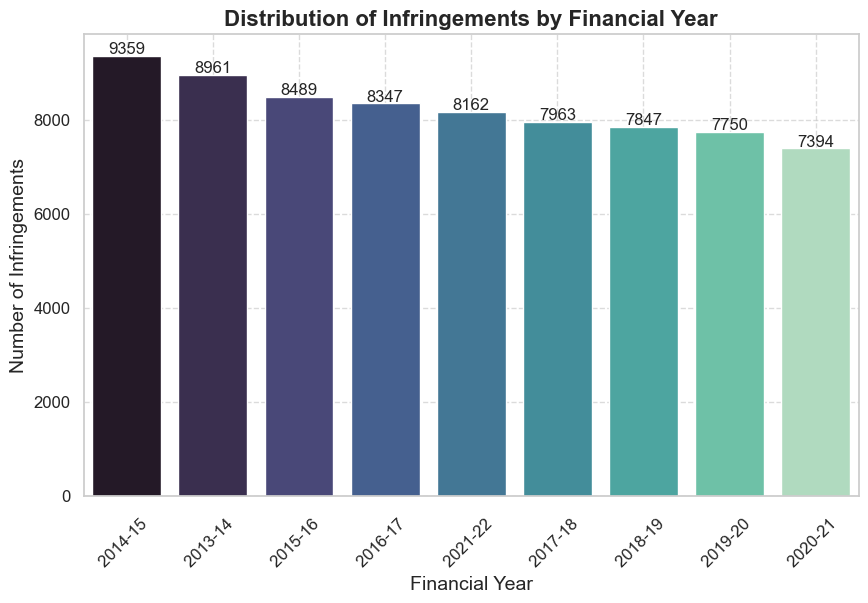

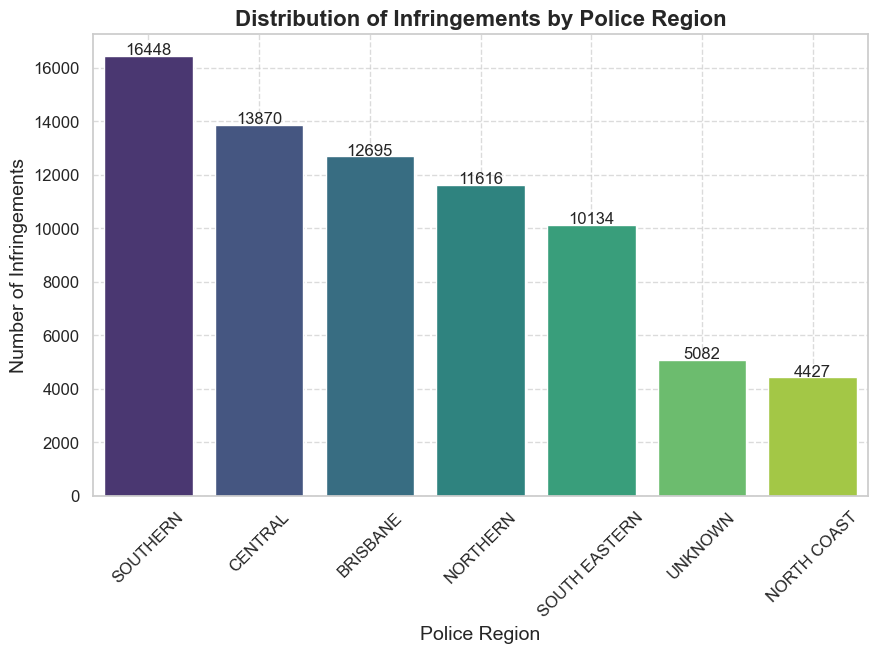

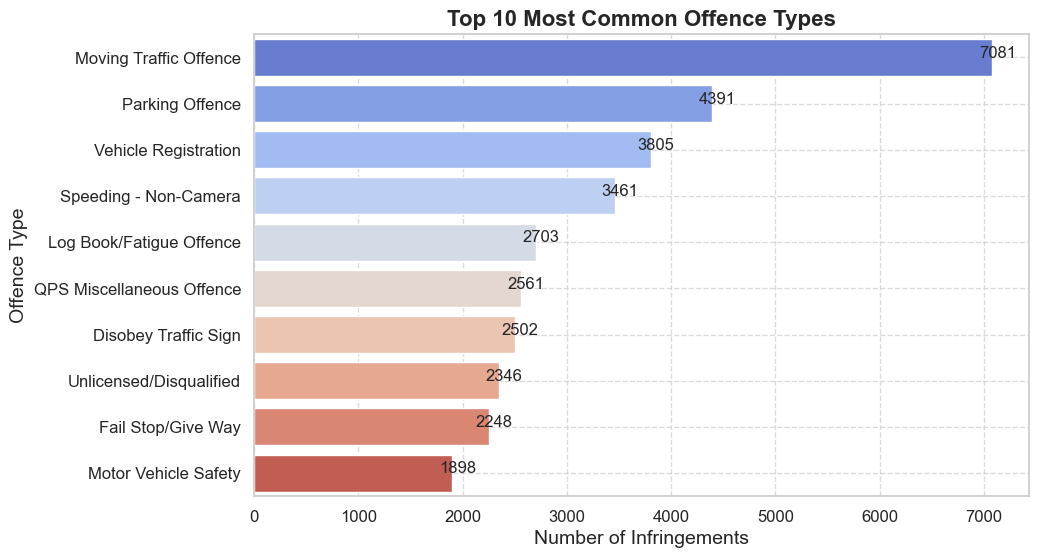

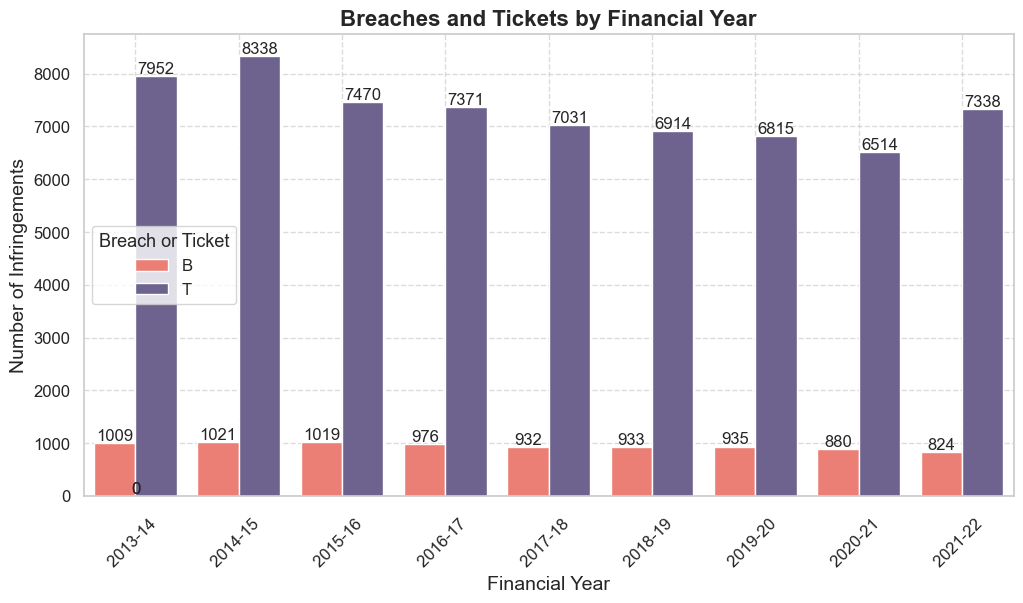

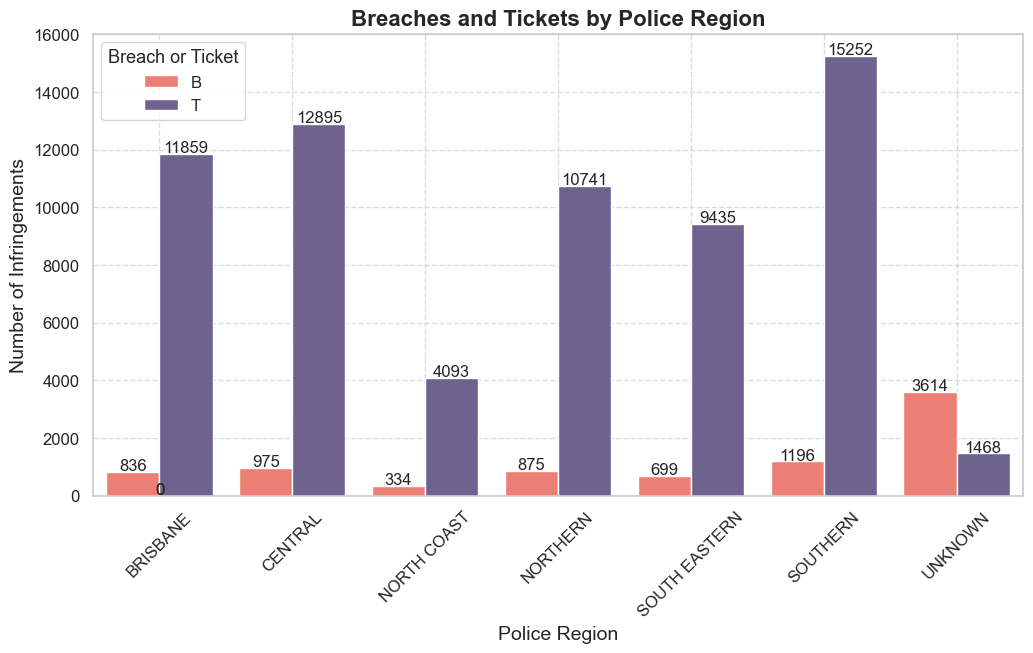

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme for seaborn
sns.set_theme(style="whitegrid", palette="pastel")

# Distribution of Infringements by Financial Year
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=clean_data, x='Financial Year', order=clean_data['Financial Year'].value_counts().index, 
                   palette='mako')
plt.title('Distribution of Infringements by Financial Year', fontsize=16, fontweight='bold')
plt.xlabel('Financial Year', fontsize=14)
plt.ylabel('Number of Infringements', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Annotating each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, '{:1.0f}'.format(height), ha="center", fontsize=12)

plt.show()

# Distribution by Police Region
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=clean_data, x='Police Region', order=clean_data['Police Region'].value_counts().index, 
                   palette='viridis')
plt.title('Distribution of Infringements by Police Region', fontsize=16, fontweight='bold')
plt.xlabel('Police Region', fontsize=14)
plt.ylabel('Number of Infringements', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Annotating each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, '{:1.0f}'.format(height), ha="center", fontsize=12)

plt.show()

# Most Common Offence Types
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=clean_data, y='Offence Type', order=clean_data['Offence Type'].value_counts().head(10).index, 
                   palette='coolwarm')
plt.title('Top 10 Most Common Offence Types', fontsize=16, fontweight='bold')
plt.xlabel('Number of Infringements', fontsize=14)
plt.ylabel('Offence Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Annotating each bar
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 50, p.get_y() + p.get_height() / 2., '{:1.0f}'.format(width), ha="center", fontsize=12)

plt.show()

# Breaches and Tickets side by side by Financial Year
plt.figure(figsize=(12, 6))
breach_ticket_by_year = clean_data.groupby(['Financial Year', 'Breach or Ticket']).size().reset_index(name='Count')
ax = sns.barplot(data=breach_ticket_by_year, x='Financial Year', y='Count', hue='Breach or Ticket', 
                 palette=['#FF6F61', '#6B5B95'])
plt.title('Breaches and Tickets by Financial Year', fontsize=16, fontweight='bold')
plt.xlabel('Financial Year', fontsize=14)
plt.ylabel('Number of Infringements', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Breach or Ticket', fontsize=12, title_fontsize='13')
plt.grid(True, linestyle='--', alpha=0.7)

# Annotating each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, '{:1.0f}'.format(height), ha="center", fontsize=12)

plt.show()

# Breaches and Tickets side by side by Police Region
plt.figure(figsize=(12, 6))
breach_ticket_by_region = clean_data.groupby(['Police Region', 'Breach or Ticket']).size().reset_index(name='Count')
ax = sns.barplot(data=breach_ticket_by_region, x='Police Region', y='Count', hue='Breach or Ticket', 
                 palette=['#FF6F61', '#6B5B95'])
plt.title('Breaches and Tickets by Police Region', fontsize=16, fontweight='bold')
plt.xlabel('Police Region', fontsize=14)
plt.ylabel('Number of Infringements', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Breach or Ticket', fontsize=12, title_fontsize='13')
plt.grid(True, linestyle='--', alpha=0.7)

# Annotating each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, '{:1.0f}'.format(height), ha="center", fontsize=12)

plt.show()


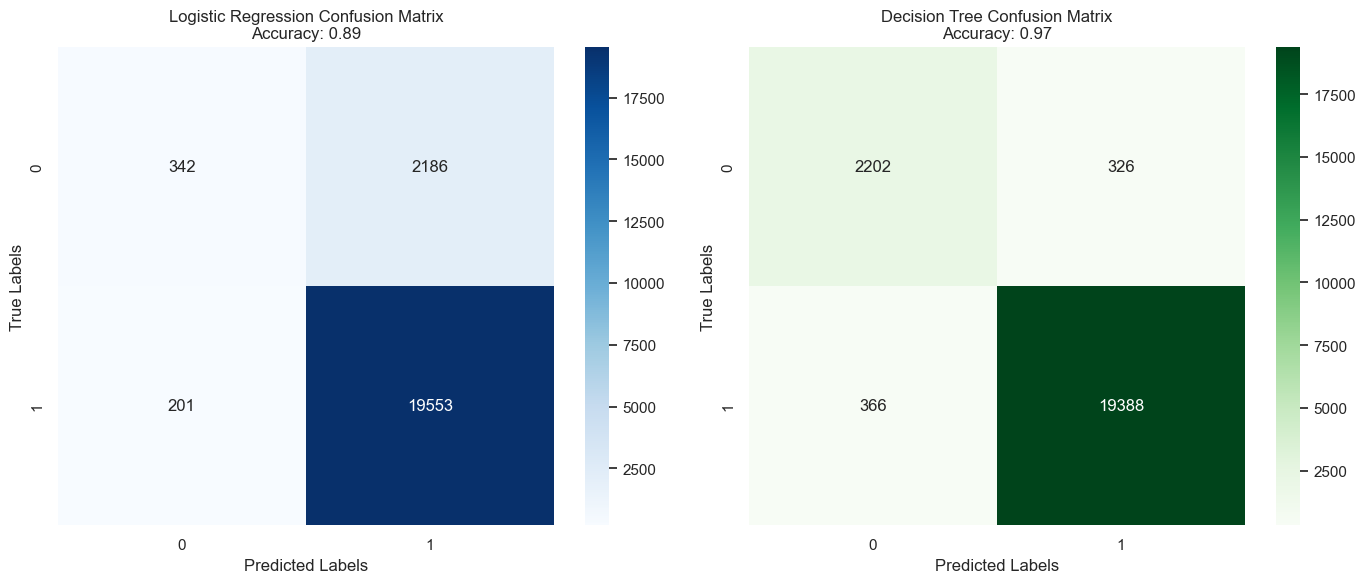

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data for machine learning
# Encode categorical features
label_encoders = {}
for column in clean_data.columns:
    if clean_data[column].dtype == 'object' or clean_data[column].dtype.name == 'category':
        le = LabelEncoder()
        clean_data[column] = le.fit_transform(clean_data[column])
        label_encoders[column] = le

# Define features (X) and target (y)
X = clean_data.drop('Breach or Ticket', axis=1)
y = clean_data['Breach or Ticket']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
logreg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier()

# Logistic Regression Model
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Decision Tree Model
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

# Evaluation for Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg, output_dict=True)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Evaluation for Decision Tree
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree, output_dict=True)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Convert classification reports to DataFrames
report_logreg_df = pd.DataFrame(report_logreg).transpose()
report_tree_df = pd.DataFrame(report_tree).transpose()



# Visualize Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Logistic Regression Confusion Matrix
sns.heatmap(conf_matrix_logreg, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title(f'Logistic Regression Confusion Matrix\nAccuracy: {accuracy_logreg:.2f}')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Decision Tree Confusion Matrix
sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title(f'Decision Tree Confusion Matrix\nAccuracy: {accuracy_tree:.2f}')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()


               Feature  Importance
0        Police Region    0.273421
1  Offence Description    0.245328
2         Offence Type    0.193619
3         Offence Code    0.181375
4                Total    0.040919
5       Financial Year    0.038591
6      Police District    0.026747


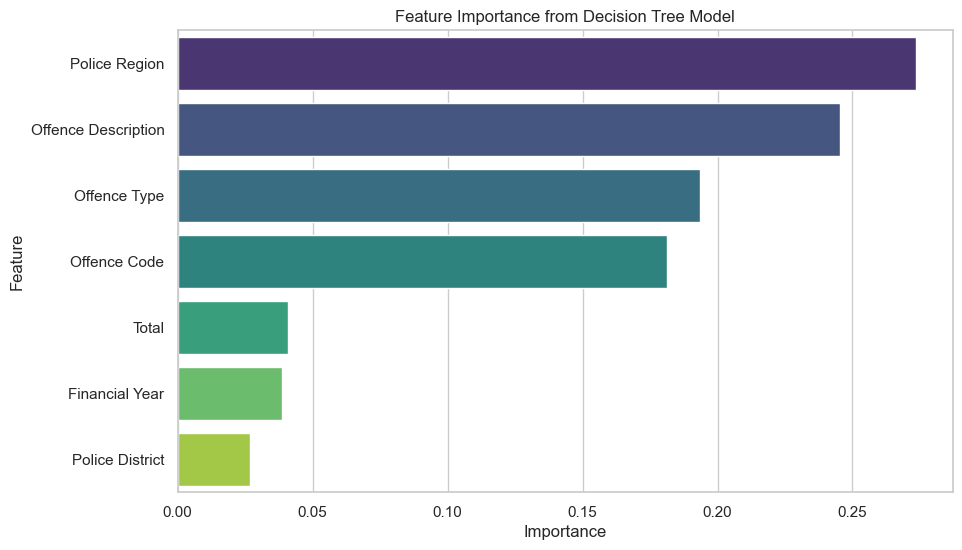

In [30]:
# Get feature importance from the Decision Tree model
feature_importances = decision_tree.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the feature importance matrix
print(feature_importance_df)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from Decision Tree Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [31]:
# Display the classification reports as tables
print("Logistic Regression Classification Report")
report_logreg_df

Logistic Regression Classification Report


,precision,recall,f1-score,support
0,0.629834,0.135285,0.222729,2528.000000
1,0.899443,0.989825,0.942472,19754.000000
accuracy,0.892873,0.892873,0.892873,0.892873
macro avg,0.764639,0.562555,0.582600,22282.000000
weighted avg,0.868855,0.892873,0.860814,22282.000000


In [32]:
print("\nDecision Tree Classification Report")
report_tree_df


Decision Tree Classification Report


,precision,recall,f1-score,support
0,0.857477,0.871044,0.864207,2528.000000
1,0.983464,0.981472,0.982467,19754.000000
accuracy,0.968944,0.968944,0.968944,0.968944
macro avg,0.920470,0.926258,0.923337,22282.000000
weighted avg,0.969170,0.968944,0.969050,22282.000000


In [33]:
print("Accuracy of Logistic regression is: ",accuracy_logreg)

Accuracy of Logistic regression is:  0.8928731711695539


In [34]:
print("Accuracy of Decision Tree Classifier is:", accuracy_tree)

Accuracy of Decision Tree Classifier is: 0.9689435418723633


Dataset 2

In [2]:
import pandas as pd

In [3]:
traffic_sample_data=pd.read_csv('Traffic_amount.csv')
traffic_sample_data

,TRAFFIC_YEAR,COLLECTION_YEAR,ROAD_SECTION_ID,ROAD_NAME,SITE_ID,SITE_TYPE,DESCRIPTION,SITE_THROUGH_DISTANCE,SEG_START_THROUGH_DISTANCE,SEG_END_THROUGH_DISTANCE,...,PC_CLASS_2F,PC_CLASS_2G,PC_CLASS_2H,PC_CLASS_2I,PC_CLASS_2J,PC_CLASS_2K,PC_CLASS_2L,GROWTH_PC_1YR,GROWTH_PC_5YR,GROWTH_PC_10YR
0,2012,2012.0,1000,EAST COAST ROAD,131646,C,Sth of Myora Res- Dunwich,2.50,0.00,9.36,...,0.10,0.05,0.04,2.89,0.02,0.03,0.0,-10.95,-1.98,-1.83
1,2012,2012.0,1000,EAST COAST ROAD,131646,C,Sth of Myora Res- Dunwich,2.50,0.00,9.36,...,0.11,0.06,0.19,2.70,0.02,0.04,0.0,-11.73,-1.86,-1.60
2,2012,2012.0,1000,EAST COAST ROAD,131646,C,Sth of Myora Res- Dunwich,2.50,0.00,9.36,...,0.12,0.07,0.33,2.51,0.01,0.04,0.0,-12.48,-1.74,-1.38
3,2012,2012.0,1000,EAST COAST ROAD,131757,C,North of Beehive Rd,11.40,9.36,16.90,...,0.11,0.06,0.03,0.66,0.03,0.01,0.0,-14.23,-2.03,-1.76
4,2012,2012.0,1000,EAST COAST ROAD,131757,C,North of Beehive Rd,11.40,9.36,16.90,...,0.14,0.05,0.03,0.76,0.02,0.02,0.0,-14.45,-1.93,-1.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73870,2022,2022.0,U98,CLEVELAND SUB-ARTERIAL ROAD,135770,C,400m East of New Cleveland Rd,6.14,6.17,7.20,...,0.19,0.17,0.05,0.15,0.04,0.00,0.0,-17.28,-0.77,-0.06
73871,2022,2022.0,U98,CLEVELAND SUB-ARTERIAL ROAD,135770,C,400m East of New Cleveland Rd,6.14,6.17,7.20,...,0.17,0.17,0.05,0.14,0.04,0.00,0.0,5.04,0.82,0.03
73872,2022,2022.0,U99,REDCLIFFE SUB-ARTERIAL ROAD,135685,C,Deveation 400m Sth of Hornibrook Hwy,3.00,0.00,3.62,...,0.14,0.14,0.08,0.26,0.05,0.00,0.0,-4.87,0.28,0.68
73873,2022,2022.0,U99,REDCLIFFE SUB-ARTERIAL ROAD,135685,C,Deveation 400m Sth of Hornibrook Hwy,3.00,0.00,3.62,...,0.14,0.14,0.07,0.26,0.05,0.00,0.0,-4.54,0.79,1.15


In [4]:
traffic_sample_data.isnull().sum()

TRAFFIC_YEAR           0
COLLECTION_YEAR       30
ROAD_SECTION_ID        0
ROAD_NAME             78
SITE_ID                0
                   ...  
PC_CLASS_2K        17197
PC_CLASS_2L        17197
GROWTH_PC_1YR      12593
GROWTH_PC_5YR      12960
GROWTH_PC_10YR     17486
Length: 64, dtype: int64

In [5]:
# Drop rows with missing values in the selected columns
traffic_sample_data_cleaned = traffic_sample_data.dropna()

# Ensure all selected columns have the correct data types
traffic_sample_data_cleaned['TRAFFIC_YEAR'] = traffic_sample_data_cleaned['TRAFFIC_YEAR'].astype(int)
traffic_sample_data_cleaned['COLLECTION_YEAR'] = traffic_sample_data_cleaned['COLLECTION_YEAR'].astype(int)
traffic_sample_data_cleaned['SITE_ID'] = traffic_sample_data_cleaned['SITE_ID'].astype(int)

# Display the cleaned data and its info
traffic_sample_data_cleaned.head(), traffic_sample_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32156 entries, 0 to 73874
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TRAFFIC_YEAR                32156 non-null  int64  
 1   COLLECTION_YEAR             32156 non-null  int64  
 2   ROAD_SECTION_ID             32156 non-null  object 
 3   ROAD_NAME                   32156 non-null  object 
 4   SITE_ID                     32156 non-null  int64  
 5   SITE_TYPE                   32156 non-null  object 
 6   DESCRIPTION                 32156 non-null  object 
 7   SITE_THROUGH_DISTANCE       32156 non-null  float64
 8   SEG_START_THROUGH_DISTANCE  32156 non-null  float64
 9   SEG_END_THROUGH_DISTANCE    32156 non-null  float64
 10  SPEED_LIMIT                 32156 non-null  float64
 11  SITE_LATITUDE               32156 non-null  float64
 12  SITE_LONGITUDE              32156 non-null  float64
 13  SEG_LONGITUDE_START         32156 no

/var/folders/t3/3fq_h4t955d785p056jy9w400000gn/T/ipykernel_28025/1630673607.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_sample_data_cleaned['TRAFFIC_YEAR'] = traffic_sample_data_cleaned['TRAFFIC_YEAR'].astype(int)
/var/folders/t3/3fq_h4t955d785p056jy9w400000gn/T/ipykernel_28025/1630673607.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_sample_data_cleaned['COLLECTION_YEAR'] = traffic_sample_data_cleaned['COLLECTION_YEAR'].astype(int)
/var/folders/t3/3fq_h4t955d785p056jy9w400000gn

(   TRAFFIC_YEAR  COLLECTION_YEAR ROAD_SECTION_ID        ROAD_NAME  SITE_ID  \
 0          2012             2012            1000  EAST COAST ROAD   131646   
 1          2012             2012            1000  EAST COAST ROAD   131646   
 2          2012             2012            1000  EAST COAST ROAD   131646   
 3          2012             2012            1000  EAST COAST ROAD   131757   
 4          2012             2012            1000  EAST COAST ROAD   131757   
 
   SITE_TYPE                 DESCRIPTION  SITE_THROUGH_DISTANCE  \
 0         C   Sth of Myora Res- Dunwich                    2.5   
 1         C   Sth of Myora Res- Dunwich                    2.5   
 2         C   Sth of Myora Res- Dunwich                    2.5   
 3         C         North of Beehive Rd                   11.4   
 4         C         North of Beehive Rd                   11.4   
 
    SEG_START_THROUGH_DISTANCE  SEG_END_THROUGH_DISTANCE  ...  PC_CLASS_2F  \
 0                        0.00            

In [6]:
traffic_sample_data_cleaned.isnull().sum()

TRAFFIC_YEAR       0
COLLECTION_YEAR    0
ROAD_SECTION_ID    0
ROAD_NAME          0
SITE_ID            0
                  ..
PC_CLASS_2K        0
PC_CLASS_2L        0
GROWTH_PC_1YR      0
GROWTH_PC_5YR      0
GROWTH_PC_10YR     0
Length: 64, dtype: int64

In [7]:
# Specify the columns you want to drop
columns_to_drop = [
    'SEG_START_THROUGH_DISTANCE', 
    'SEG_END_THROUGH_DISTANCE', 
    'SEG_LONGITUDE_START', 
    'SEG_LATITUDE_START', 
    'SEG_LONGITUDE_END', 
    'SEG_LATITUDE_END',
    'PC_CLASS_0A', 
    'PC_CLASS_0B', 
    'PC_CLASS_1A', 
    'PC_CLASS_1B', 
    'PC_CLASS_1C', 
    'PC_CLASS_1D', 
    'PC_CLASS_2A', 
    'PC_CLASS_2B', 
    'PC_CLASS_2C', 
    'PC_CLASS_2D', 
    'PC_CLASS_2E', 
    'PC_CLASS_2F', 
    'PC_CLASS_2G', 
    'PC_CLASS_2H', 
    'PC_CLASS_2I', 
    'PC_CLASS_2J', 
    'PC_CLASS_2K', 
    'PC_CLASS_2L',
    'GROWTH_PC_10YR',
    'GROWTH_PC_5YR'
]

# Drop the columns from the dataframe
traffic_data_for_model = traffic_sample_data_cleaned.drop(columns=columns_to_drop)

# Display the first few rows of the cleaned dataframe to verify
traffic_data_for_model.head()


,TRAFFIC_YEAR,COLLECTION_YEAR,ROAD_SECTION_ID,ROAD_NAME,SITE_ID,SITE_TYPE,DESCRIPTION,SITE_THROUGH_DISTANCE,SPEED_LIMIT,SITE_LATITUDE,...,AADT_CLASS_2D,AADT_CLASS_2E,AADT_CLASS_2F,AADT_CLASS_2G,AADT_CLASS_2H,AADT_CLASS_2I,AADT_CLASS_2J,AADT_CLASS_2K,AADT_CLASS_2L,GROWTH_PC_1YR
0,2012,2012,1000,EAST COAST ROAD,131646,C,Sth of Myora Res- Dunwich,2.5,70.0,-27.482689,...,4.4352,1.2096,1.0080,0.5040,0.4032,29.1312,0.2016,0.3024,0.0,-10.95
1,2012,2012,1000,EAST COAST ROAD,131646,C,Sth of Myora Res- Dunwich,2.5,70.0,-27.482689,...,8.7376,2.6416,2.2352,1.2192,3.8608,54.8640,0.4064,0.8128,0.0,-11.73
2,2012,2012,1000,EAST COAST ROAD,131646,C,Sth of Myora Res- Dunwich,2.5,70.0,-27.482689,...,4.1984,1.4336,1.2288,0.7168,3.3792,25.7024,0.1024,0.4096,0.0,-12.48
3,2012,2012,1000,EAST COAST ROAD,131757,C,North of Beehive Rd,11.4,80.0,-27.433770,...,10.6496,1.9136,0.9152,0.4992,0.2496,5.4912,0.2496,0.0832,0.0,-14.23
4,2012,2012,1000,EAST COAST ROAD,131757,C,North of Beehive Rd,11.4,80.0,-27.433770,...,13.9108,3.1844,2.3464,0.8380,0.5028,12.7376,0.3352,0.3352,0.0,-14.45


In [8]:
traffic_data_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32156 entries, 0 to 73874
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TRAFFIC_YEAR           32156 non-null  int64  
 1   COLLECTION_YEAR        32156 non-null  int64  
 2   ROAD_SECTION_ID        32156 non-null  object 
 3   ROAD_NAME              32156 non-null  object 
 4   SITE_ID                32156 non-null  int64  
 5   SITE_TYPE              32156 non-null  object 
 6   DESCRIPTION            32156 non-null  object 
 7   SITE_THROUGH_DISTANCE  32156 non-null  float64
 8   SPEED_LIMIT            32156 non-null  float64
 9   SITE_LATITUDE          32156 non-null  float64
 10  SITE_LONGITUDE         32156 non-null  float64
 11  DISTRICT_ID            32156 non-null  float64
 12  DISTRICT_NAME          32156 non-null  object 
 13  REGION_ID              32156 non-null  float64
 14  REGION_NAME            32156 non-null  object 
 15  LGA_ID 

In [ ]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["OMP_NUM_THREADS"] = "1"


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

# Select relevant columns for the analysis


# Filter the cleaned data to include only the selected columns


# Convert categorical columns to dummy variables
traffic_data_for_model = pd.get_dummies(traffic_data_for_model, drop_first=True)

# Define features (X) and target (y)
X = traffic_data_for_model.drop('GROWTH_PC_1YR', axis=1)
y = traffic_data_for_model['GROWTH_PC_1YR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
# linear_reg = LinearRegression()
random_forest = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=42)
# Initialize the K-Nearest Neighbors Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train models
# linear_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Train the KNN model
knn_regressor.fit(X_train, y_train)

# Make predictions
# y_pred_lr = linear_reg.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

# Make predictions with the KNN model
y_pred_knn = knn_regressor.predict(X_test)

# Evaluate models
# mae_lr = mean_absolute_error(y_test, y_pred_lr)
# r2_lr = r2_score(y_test, y_pred_lr)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Evaluate the KNN model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

(mae_rf, r2_rf),(mae_knn, r2_knn)


((9.85547566012011, 0.12693527520952463),
 (10.329504094537162, -0.008673218596931154))

In [29]:
# Create a DataFrame to display the results in a table format
results = {
    'Model': ['Random Forest Regressor', 'K-Nearest Neighbors Regressor'],
    'Mean Absolute Error (MAE)': [9.86, 10.33],
    'R-Squared (R²)': [0.13, -0.01]
}

results_df = pd.DataFrame(results)

# Display the table
results_df


,Model,Mean Absolute Error (MAE),R-Squared (R²)
0,Random Forest Regressor,9.86,0.13
1,K-Nearest Neighbors Regressor,10.33,-0.01


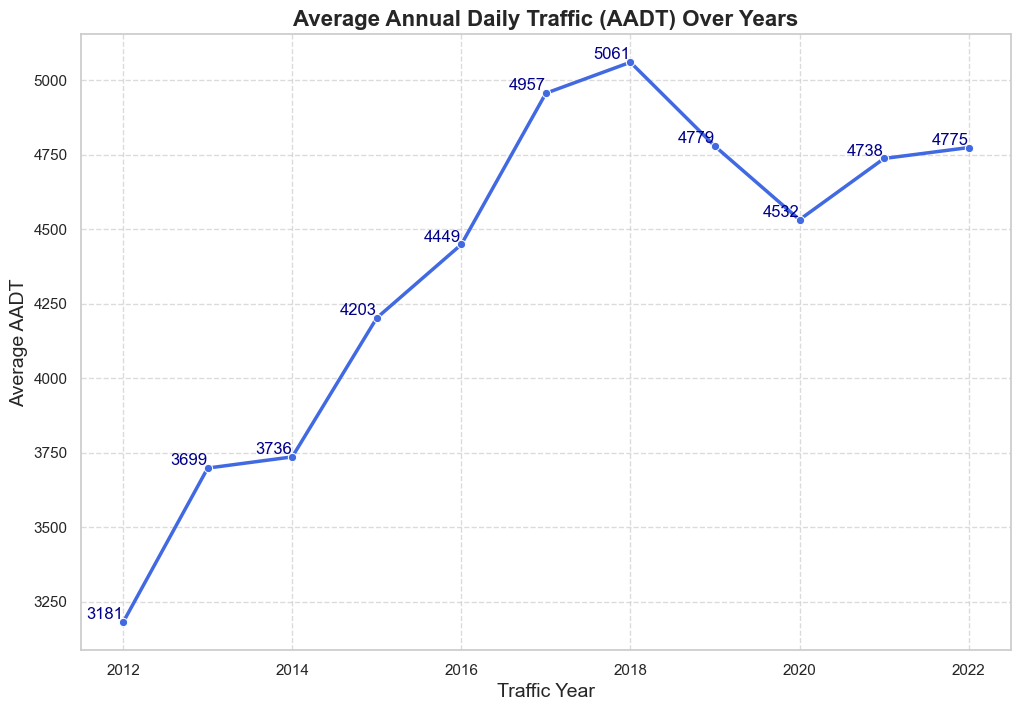

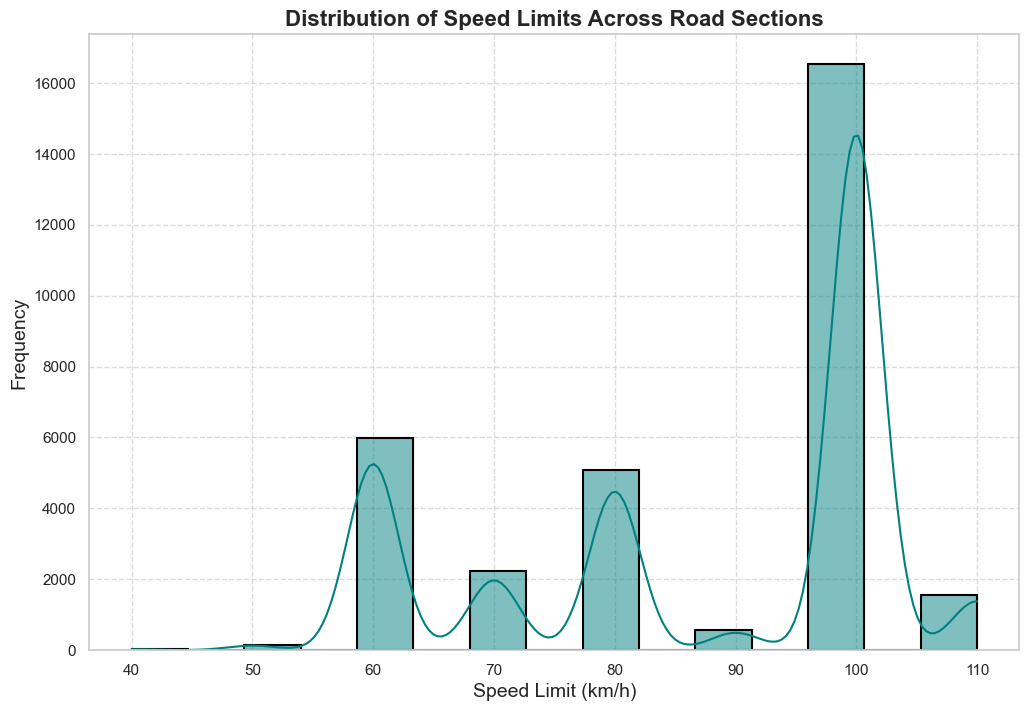

/var/folders/t3/3fq_h4t955d785p056jy9w400000gn/T/ipykernel_28025/924343399.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_growth.values, y=region_growth.index, palette='Spectral', edgecolor='black')


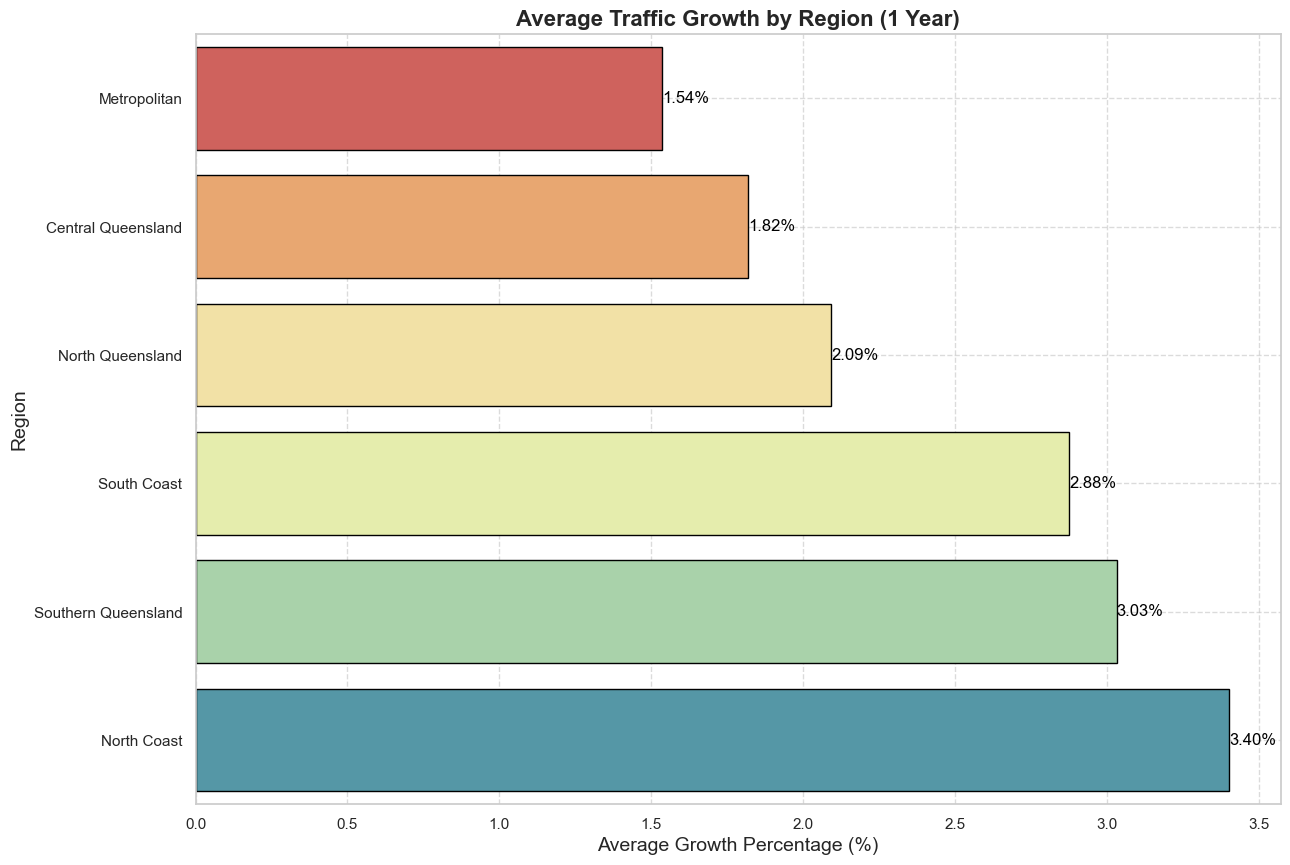

/var/folders/t3/3fq_h4t955d785p056jy9w400000gn/T/ipykernel_28025/924343399.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SITE_TYPE', y='AADT', data=traffic_data_for_model, palette='Set2', notch=True, linewidth=2.5)


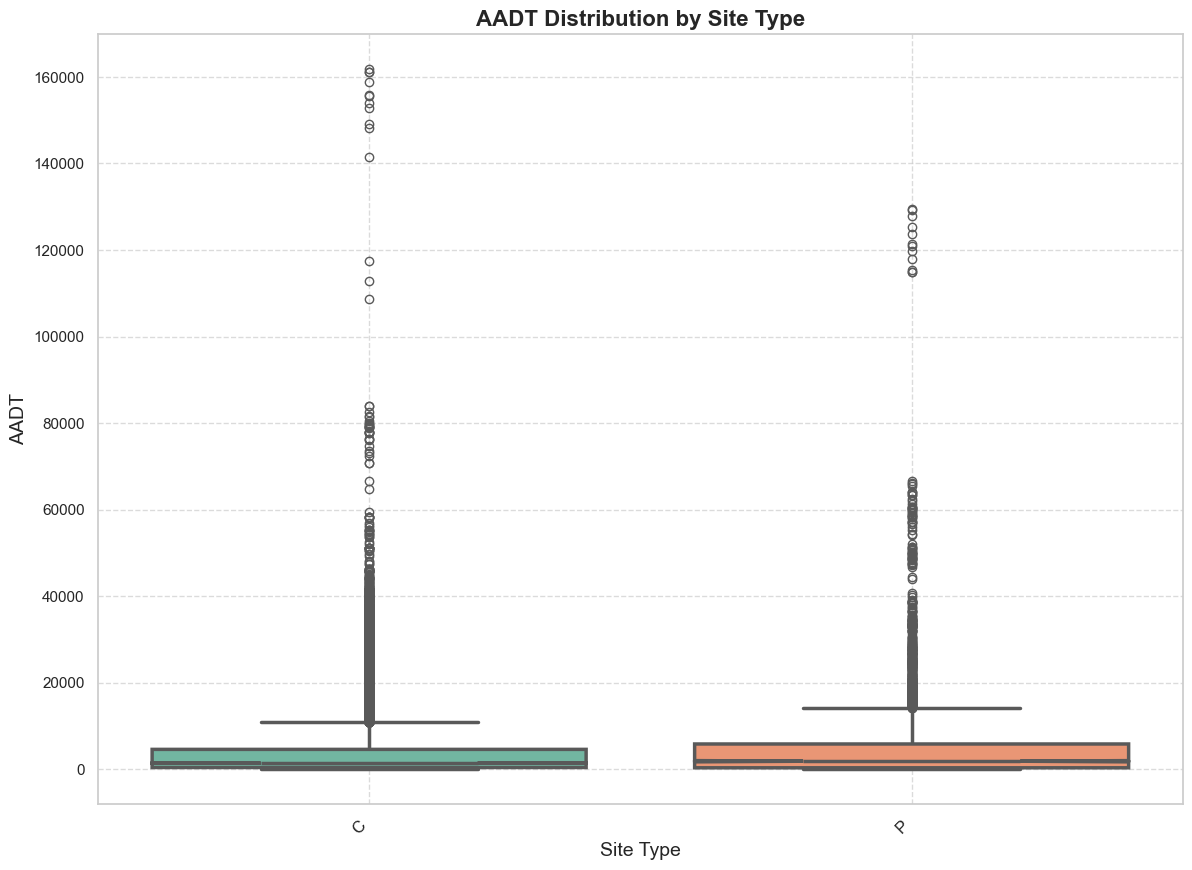

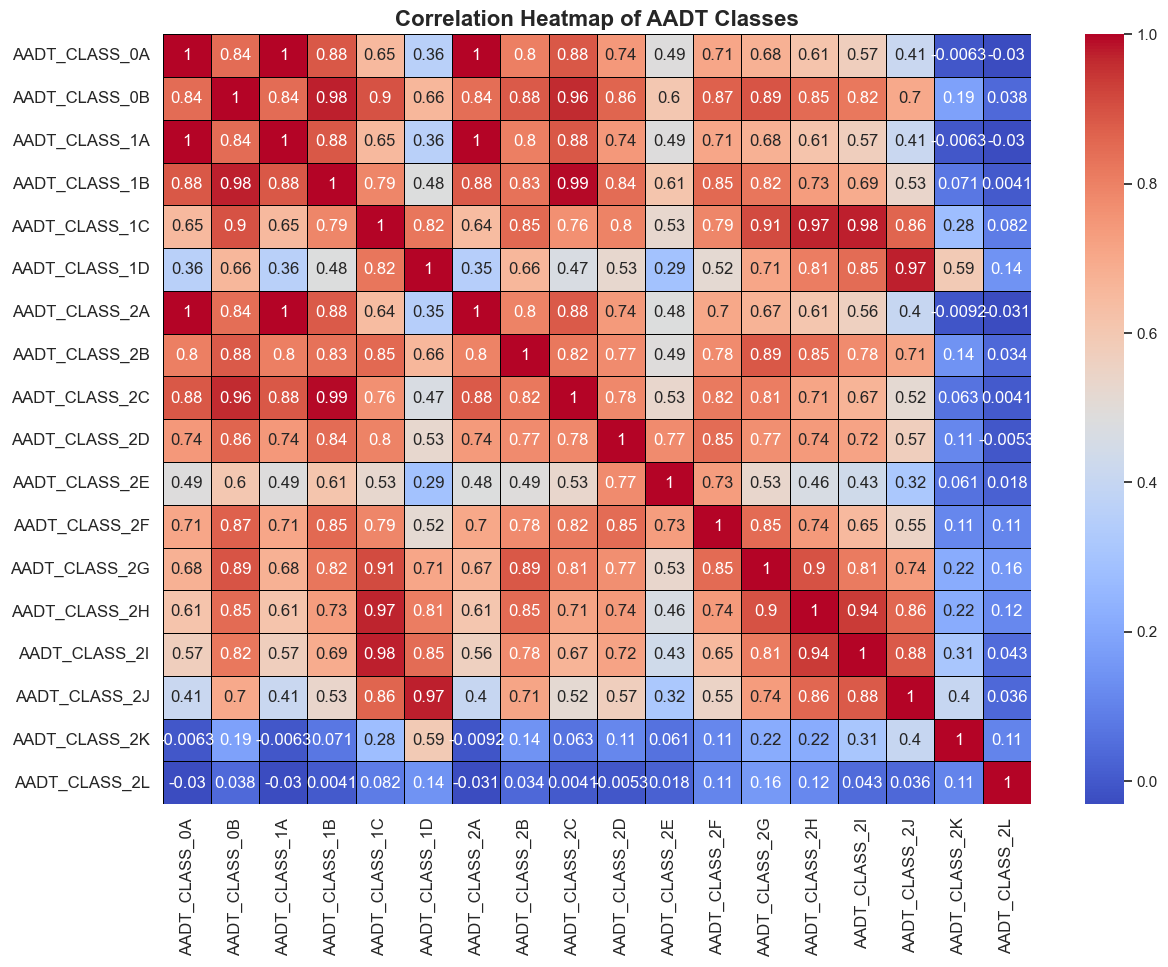

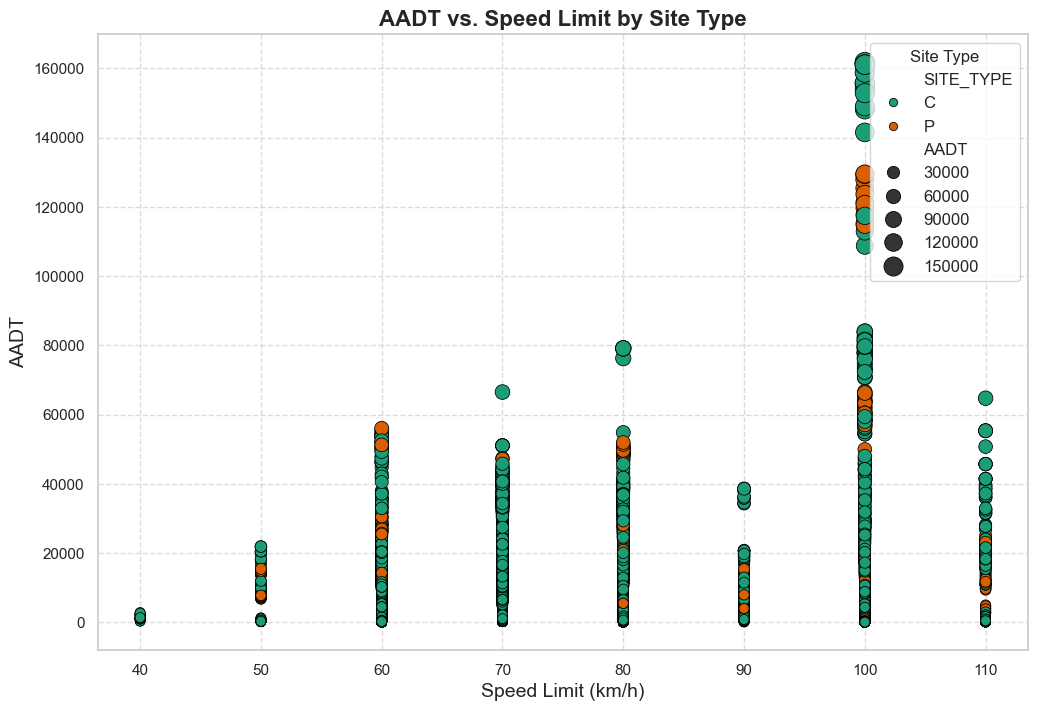

/var/folders/t3/3fq_h4t955d785p056jy9w400000gn/T/ipykernel_28025/924343399.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_aadt.values, y=region_aadt.index, palette='plasma', edgecolor='black')


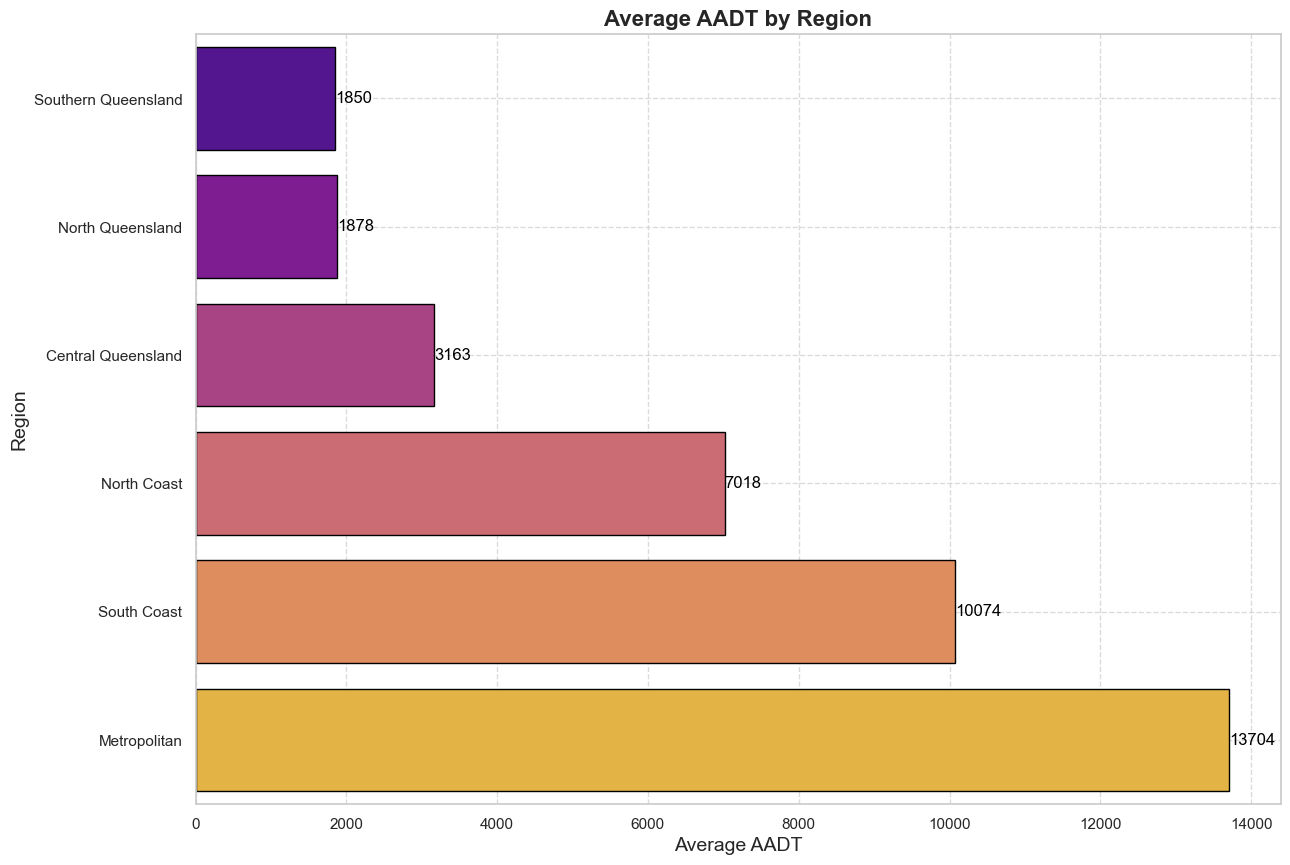

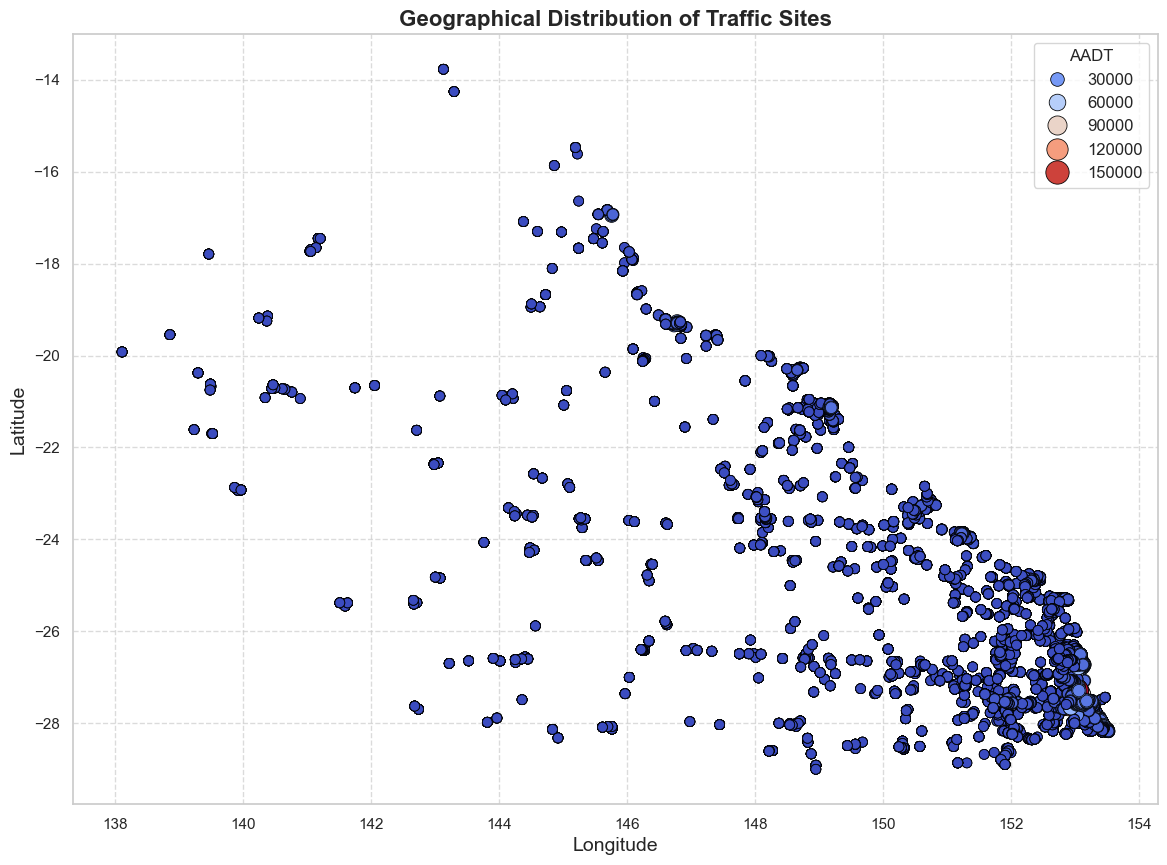

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set overall theme
sns.set(style="whitegrid")

# Visualization 1: Traffic Volume Over Time (AADT by Year)
aadt_by_year = traffic_data_for_model.groupby('TRAFFIC_YEAR')['AADT'].mean()

plt.figure(figsize=(12, 8))
sns.lineplot(x=aadt_by_year.index, y=aadt_by_year.values, marker='o', color='royalblue', linewidth=2.5)

for x, y in zip(aadt_by_year.index, aadt_by_year.values):
    plt.text(x, y, f'{y:.0f}', ha='right', va='bottom', color='darkblue')

plt.title('Average Annual Daily Traffic (AADT) Over Years', fontsize=16, fontweight='bold')
plt.xlabel('Traffic Year', fontsize=14)
plt.ylabel('Average AADT', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Visualization 2: Distribution of Speed Limits
plt.figure(figsize=(12, 8))
sns.histplot(traffic_data_for_model['SPEED_LIMIT'], bins=15, kde=True, color='teal', edgecolor='black', linewidth=1.5)
plt.title('Distribution of Speed Limits Across Road Sections', fontsize=16, fontweight='bold')
plt.xlabel('Speed Limit (km/h)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Visualization 3: Traffic Growth by Region
region_growth = traffic_data_for_model.groupby('REGION_NAME')['GROWTH_PC_1YR'].mean().sort_values()

plt.figure(figsize=(14, 10))
sns.barplot(x=region_growth.values, y=region_growth.index, palette='Spectral', edgecolor='black')

for i, value in enumerate(region_growth.values):
    plt.text(value, i, f'{value:.2f}%', ha='left', va='center', fontsize=12, color='black')

plt.title('Average Traffic Growth by Region (1 Year)', fontsize=16, fontweight='bold')
plt.xlabel('Average Growth Percentage (%)', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Visualization 4: AADT Distribution by Road Type
plt.figure(figsize=(14, 10))
sns.boxplot(x='SITE_TYPE', y='AADT', data=traffic_data_for_model, palette='Set2', notch=True, linewidth=2.5)

plt.title('AADT Distribution by Site Type', fontsize=16, fontweight='bold')
plt.xlabel('Site Type', fontsize=14)
plt.ylabel('AADT', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Visualization 5: Heatmap of Correlation Between AADT Classes
aadt_classes = traffic_data_for_model.loc[:, traffic_data_for_model.columns.str.startswith('AADT_CLASS')]

plt.figure(figsize=(14, 10))
sns.heatmap(aadt_classes.corr(), annot=True, cmap='coolwarm', annot_kws={'size': 12}, linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap of AADT Classes', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Visualization 6: Scatter Plot of AADT vs. Speed Limit
plt.figure(figsize=(12, 8))
sns.scatterplot(x='SPEED_LIMIT', y='AADT', data=traffic_data_for_model, hue='SITE_TYPE', size='AADT', sizes=(50, 200), palette='Dark2', edgecolor='black')

plt.title('AADT vs. Speed Limit by Site Type', fontsize=16, fontweight='bold')
plt.xlabel('Speed Limit (km/h)', fontsize=14)
plt.ylabel('AADT', fontsize=14)
plt.legend(title='Site Type', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Visualization 7: Regional AADT Comparison
region_aadt = traffic_data_for_model.groupby('REGION_NAME')['AADT'].mean().sort_values()

plt.figure(figsize=(14, 10))
sns.barplot(x=region_aadt.values, y=region_aadt.index, palette='plasma', edgecolor='black')

for i, value in enumerate(region_aadt.values):
    plt.text(value, i, f'{value:.0f}', ha='left', va='center', fontsize=12, color='black')

plt.title('Average AADT by Region', fontsize=16, fontweight='bold')
plt.xlabel('Average AADT', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Visualization 8: Map Visualization of Traffic Sites
plt.figure(figsize=(14, 10))
sns.scatterplot(x='SITE_LONGITUDE', y='SITE_LATITUDE', data=traffic_data_for_model, hue='AADT', size='AADT', sizes=(50, 300), palette='coolwarm', edgecolor='black')

plt.title('Geographical Distribution of Traffic Sites', fontsize=16, fontweight='bold')
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.legend(title='AADT', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
